In [1]:
%load_ext autoreload
%autoreload 2

from IPython import display
from lib.viz import showarray
import matplotlib.pyplot as plt

import pybullet as p
import numpy as np
import cv2

from lib.pyb.pybullet_robot import World, Manipulator, FixedCamera, LinkedCamera

In [2]:
N = 1000
NJ = 4
PHI_AMP = np.pi/4

w = World(gui=False)
# side camera is on axis X, 2 units away, looking towards zero
side_cam = FixedCamera(w, np.array(((3,0,0), (-1,0,0), (0,0,1))))

# zero out angles of all X joints, to enforce movement on YZ plane only
phis = np.random.uniform(low=-PHI_AMP, high=PHI_AMP, size=(N, NJ, 2))
phis[:,:,0] = 0

n_styles = len(Manipulator.STYLES)
side_imgs = np.zeros((n_styles, phis.shape[0], side_cam.H, side_cam.W, 4))
#eye_imgs = np.zeros((n_styles, phis.shape[0], eye_cam.H, eye_cam.W, 4))

for style_idx, style_name in enumerate(Manipulator.STYLES):
    m = Manipulator(w, NJ, NJ, style=style_name)
    #eye_cam = LinkedCamera(w, m.body_id, m.eye_link_id)

    for phi_idx in range(phis.shape[0]):
        m.step(phis[phi_idx])
        w.step()

        side_imgs[style_idx][phi_idx] = side_cam.getRGBAImage()
        #eye_imgs[i] = eye_cam.getRGBAImage()

    #eye_cam.close()
    m.close()

side_cam.close()
w.close()

In [2]:
styles_fname = 'styles.npz'

In [3]:
np.savez_compressed(styles_fname, phis=phis, side_imgs=side_imgs)

In [3]:
data = np.load(styles_fname)
print(data['phis'].shape)
print(data['side_imgs'].shape)

(1000, 4, 2)
(3, 1000, 224, 224, 4)


(array([403., 372., 406., 431., 417., 400., 381., 403., 367., 420.]),
 array([-7.85346567e-01, -6.28366794e-01, -4.71387021e-01, -3.14407249e-01,
        -1.57427476e-01, -4.47703280e-04,  1.56532069e-01,  3.13511842e-01,
         4.70491615e-01,  6.27471388e-01,  7.84451160e-01]),
 <BarContainer object of 10 artists>)

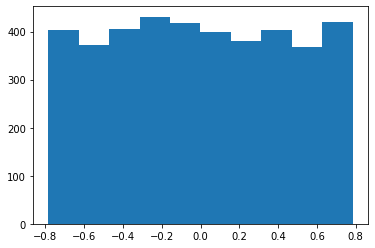

In [4]:
plt.hist(data['phis'][:,:,1].flatten())

In [5]:
def show_side_imgs(data, N):
    imgs = data['side_imgs']
    
    rows = None
    for i in range(N):
        row = None
        for style_idx, _ in enumerate(Manipulator.STYLES):
            img = imgs[style_idx][i]
            if row is None:
                row = img
            else:
                row = np.hstack((row, img))
        if rows is None:
            rows = row
        else:
            rows = np.vstack((rows, row))

    showarray(rows)

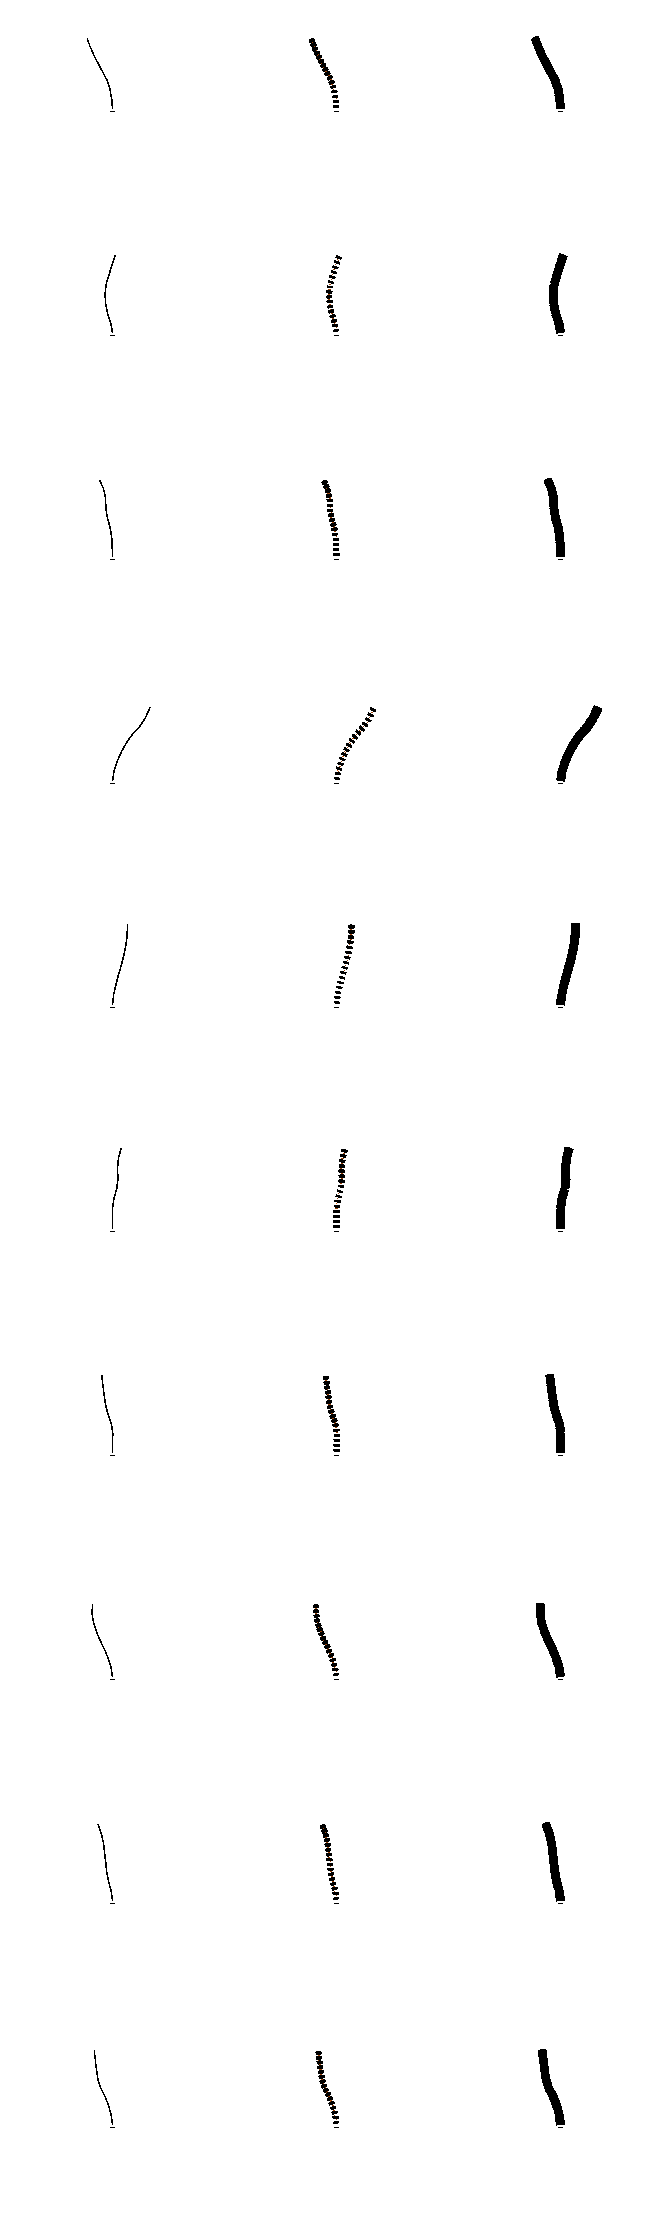

In [7]:
show_side_imgs(data, 10)